In [622]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


In [623]:
class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()

        stuck = 0
        while True:
            neighbor = problem.bestNeighbor(current)  # Obtain best neighbor state from current one
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if np.array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=10):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)

        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Solution state:')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0

        while True:
            t += 1
            T = schedule(t)

            if T == 0:
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()


In [624]:
class NQueens:
    def __init__(self, N):
        self.N = N
        self.maxValue = 0
        # self.state = np.array([i for i in range(1, self.N+1)])
        # np.random.shuffle(self.state)
        self.state = np.array([rnd.randint(1, self.N) for i in range(self.N)])
        self.printState(self.state, 'Start state:')

    def printState(self, state, msg=''):
        print(msg, state, '|', self.stateValue(state))

    def initialState(self):
        return self.state

    def randomNeighbor(self, state):
        col = rnd.randint(0, self.N-1)
        row = state[col]

        newRow = rnd.randint(1, self.N)
        while newRow == row:
            newRow = rnd.randint(1, self.N)

        state[col] = newRow
        return state

    def bestNeighbor(self, state):
        bestState = state.copy()

        bestState[0] = self.N+1 - bestState[0]  # Change the first queen

        bestValue = self.stateValue(bestState)

        cols = np.array([i for i in range(self.N)])
        np.random.shuffle(cols)

        for col in cols:
            newState = state.copy()
            for row in range(1, self.N+1):
                if row != state[col]:
                    newState[col] = row
                    newValue = self.stateValue(newState)
                    if newValue >= bestValue:
                        bestState = newState.copy()
                        bestValue = newValue

        return bestState

    def stateValue(self, state):
        value = 0
        for i in range(self.N - 1):
            for j in range(i+1, self.N):
                if state[j] == state[i] or abs(state[j] - state[i]) == j - i:
                    value += 1

        value *= -1
        return value


In [625]:
class TravellingSalesman:
    def __init__(self, N, size=100):
        self.N = N
        self.state = np.array([], dtype=int)

        for i in range(N):
            # Check that every city is different
            city = [rnd.randint(0, size), rnd.randint(0, size)]
            while city in self.state:
                city = [rnd.randint(0, size), rnd.randint(0, size)]

            self.state = np.append(self.state, city)

        self.state = np.reshape(self.state, (N, 2))
        self.printState(self.state, 'Start state:')


    def printState(self, state, msg=''):
        #print(msg, state, '|', self.stateValue(state))

        plt.figure()
        plt.title(msg)
        plt.plot(*zip(*state), 'o-')
        for i in range(self.N):
            plt.annotate(f'  {i+1}', (state[i][0], state[i][1]))

    def initialState(self):
        np.random.shuffle(self.state)
        return self.state

    def distanceBetweenCities(self, city1, city2):
        return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

    def randomNeighbor(self, state):
        choices = np.array([i for i in range(self.N)])
        np.random.shuffle(choices)

        city1Index = choices.pop(0)
        city2Index = choices.pop(0)

        # Swap cities
        tempCity = state[city1Index]
        state[city1Index] = state[city2Index]
        state[city2Index] = tempCity

        return state

    def bestNeighbor(self, state):
        bestState = state.copy()

        # Swap first 2 cities
        tempCity = bestState[0].copy()
        bestState[0] = bestState[1].copy()
        bestState[1] = tempCity

        bestValue = self.stateValue(bestState)

        indexes = np.array([i for i in range(self.N-1)])
        np.random.shuffle(indexes)

        for i in indexes:
            for j in range(i+1, self.N):
                newState = state.copy()

                # Swap cities
                tempCity = newState[i].copy()
                newState[i] = newState[j].copy()
                newState[j] = tempCity

                newValue = self.stateValue(newState)
                if newValue >= bestValue:
                    bestState = newState.copy()
                    bestValue = newValue

        return bestState

    def stateValue(self, state):
        totalDistance = 0
        for i in range(self.N-1):
            totalDistance += self.distanceBetweenCities(state[i], state[i+1])

        totalDistance *= -1
        return totalDistance


C:\Users\Kiko\AppData\Local\Temp/ipykernel_177176/1198489249.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while city in self.state:


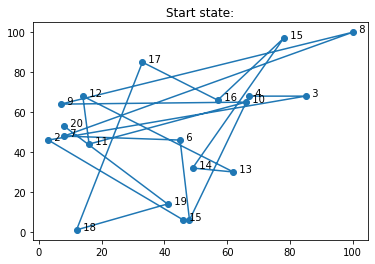

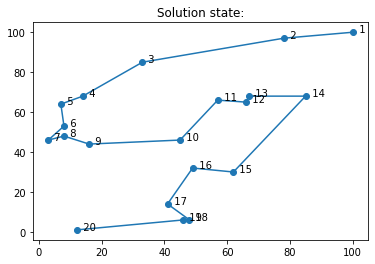

In [626]:
if __name__ == '__main__':
    # SearchAlgorithms.hillClimbingWithRandomRestart(NQueens(20))
    SearchAlgorithms.hillClimbingWithRandomRestart(TravellingSalesman(20))


    plt.show()
